## CB Paramater Fitting using Historical Data

In [385]:
import pandas as pd
import matplotlib.pyplot as plt

In [393]:
class DataStruct:
    def __init__(self, file_name, columns_to_keep, last_row_to_keep, column_names, min_required_per_column, had_hack):
        self.file_name = file_name
        self.columns_to_keep = columns_to_keep
        self.last_row_to_keep = last_row_to_keep
        self.column_names = column_names
        self.min_required_per_column = min_required_per_column
        self.had_hack = had_hack

    def load_and_clean_data(self):
        df = pd.read_csv('data/' + self.file_name)
        df = df.iloc[4:]
        df = df.iloc[:, 1:]
        df = df.iloc[:self.last_row_to_keep, self.columns_to_keep]
        df.columns = self.column_names
        df = df.apply(pd.to_numeric)

        for ind, column in enumerate(df.columns):
            df[column + '_diff'] = df[column].diff()
            df[column + '_diff'] = df[column + '_diff'] / df[column].shift(1)
            df[column + '_threshold'] = df[column].shift(
                1) > self.min_required_per_column[ind]
        
        return df
    
def plot_data(data_struct: DataStruct) -> None:
    df = data_struct.load_and_clean_data()
    plt.figure(figsize=(10,6))

    for column in df[data_struct.column_names]:
        if('diff' not in column and 'threshold' not in column):
            plt.plot(df[column] / max(df[column]), label=column)

    plt.xlabel('Days')
    plt.ylabel('Token Notional Amount')
    plt.title('Token Notional Amounts over time / MAX')
    plt.legend()
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(10,6))

    for column in df.columns[len(data_struct.column_names):]:
        if('diff' in column):
            # find where threshold is met
            temp_column = column[:-5]
            df_filtered = df[df[temp_column + '_threshold'] == True]
            plt.plot(df_filtered[column], label=column)

    plt.xlabel('Days')
    plt.ylabel("% Change to yesterday")
    plt.title("% Change to yesterday")
    plt.legend()
    plt.grid(True)
    plt.show()

    # Create histogram of daily percentage change in token notional amount combined
    plt.figure(figsize=(10,6))

    for column in df.columns[len(data_struct.column_names):]:
        if('diff' in column):
            temp_column = column[:-5]
            df_filtered = df[df[temp_column + '_threshold'] == True]
            plt.hist(df_filtered[column], bins=100, alpha=1/len(data_struct.column_names), label=column)

    # plot the last data point red for each column
    if data_struct.had_hack:
        for column in df.columns[len(data_struct.column_names):]:
            if('diff' in column):
                temp_column = column[:-5]
                df_filtered = df[df[temp_column + '_threshold'] == True]
                plt.plot(df_filtered[column].iloc[-1], 0, 'ro', label=column[:-5]+"_on_hack_day") 

    # only show less than 1
    plt.xlim(-1, 0.1)
    plt.xlabel('Daily Percentage Change')
    plt.ylabel('Frequency')
    plt.title(str(data_struct.file_name).capitalize()[:-4] + ': Daily Notional Percentage Change')
    plt.legend()
    plt.grid(True)
    plt.show()


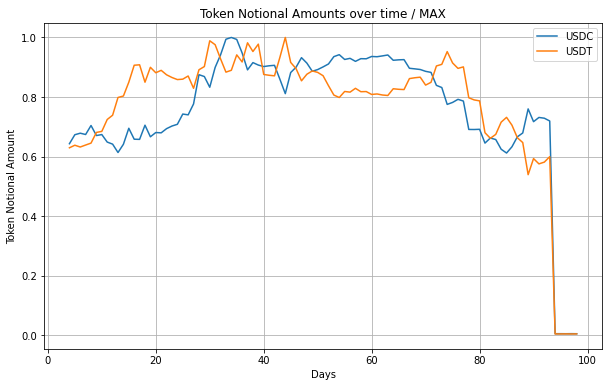

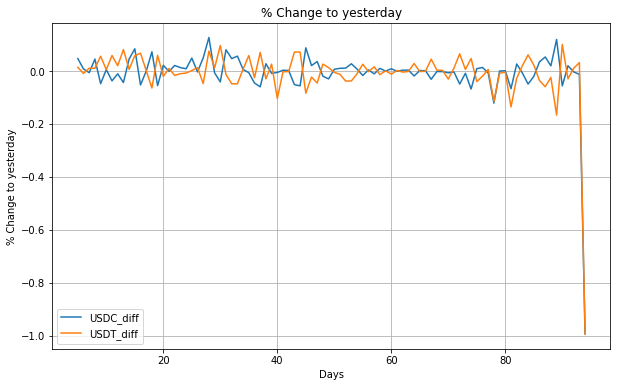

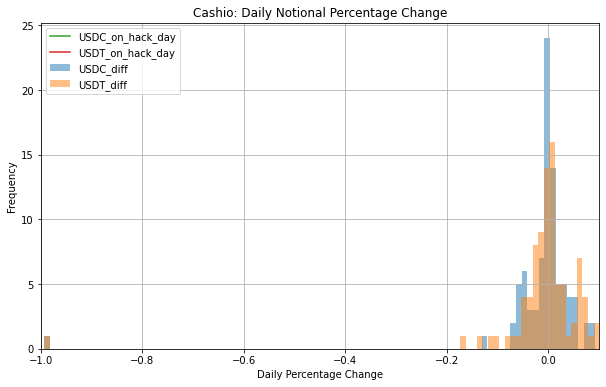

In [394]:
# # loading data
data_struct = DataStruct('cashio.csv', [13, 14], 95, ['USDC', 'USDT'], [1_000_000, 1_000_000], True)
plot_data(data_struct)


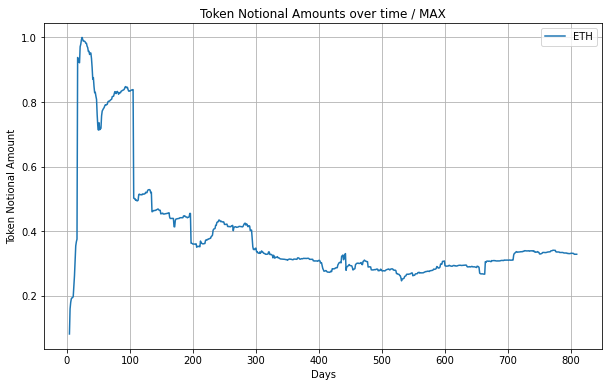

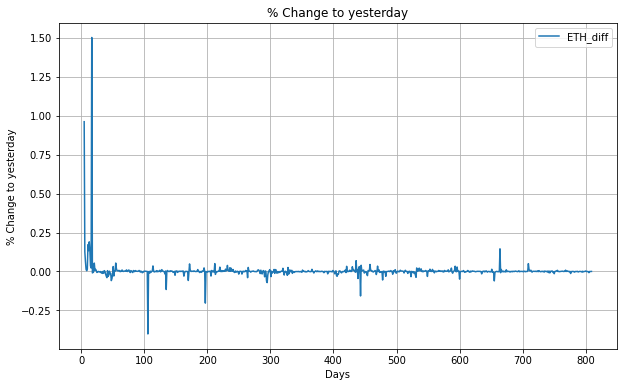

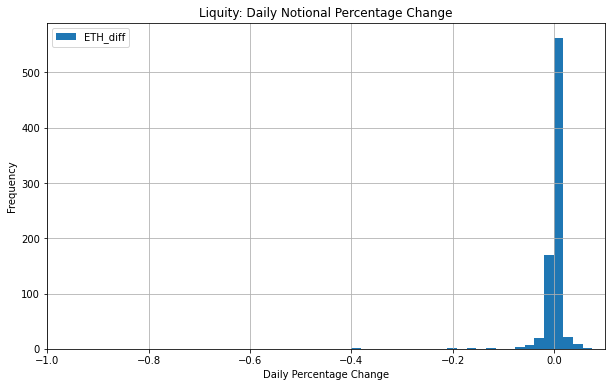

In [388]:
data_struct = DataStruct('liquity.csv', [7], 4000, ['ETH'], [2_000], False)
plot_data(data_struct)

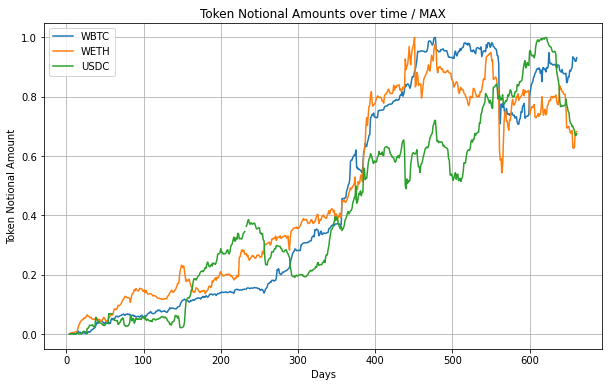

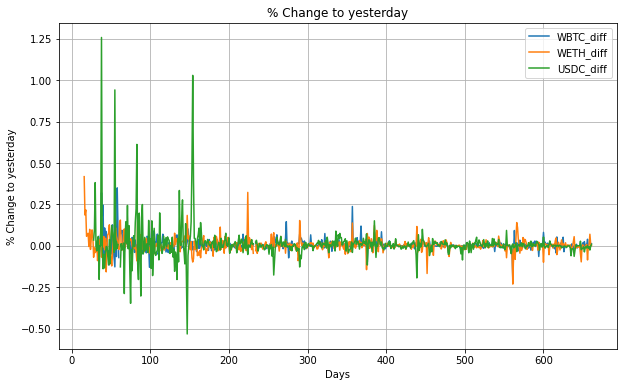

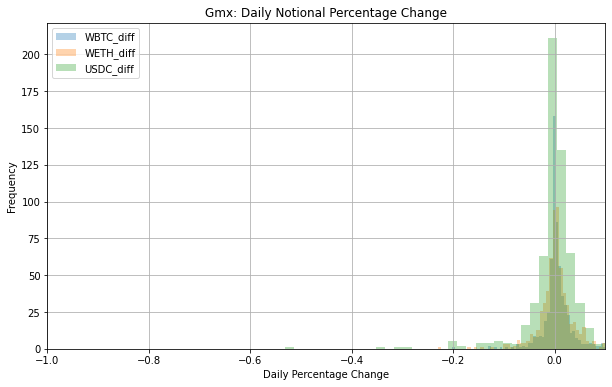

In [389]:
data_struct = DataStruct('gmx.csv', [46,47,48], 1000, ["WBTC","WETH","USDC"], [80, 2_000, 2_500_000 ], False)
plot_data(data_struct)

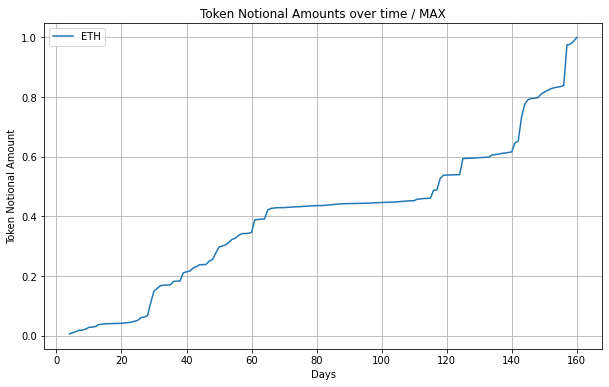

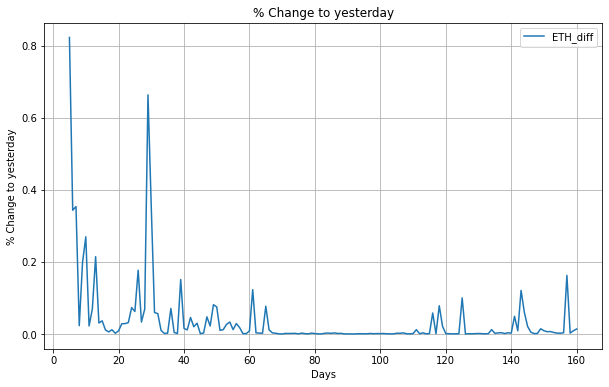

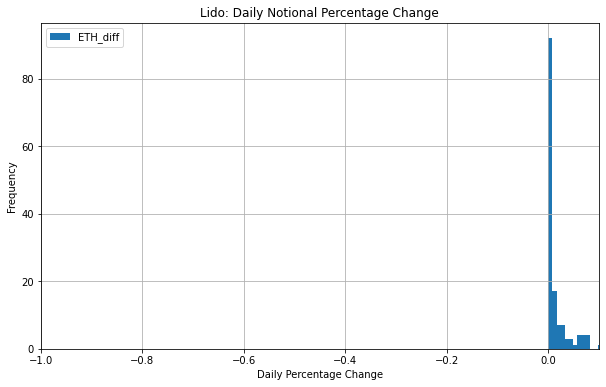

In [390]:
data_struct = DataStruct('lido.csv', [28], 1000, ["ETH"], [ 2_000], False)
plot_data(data_struct)

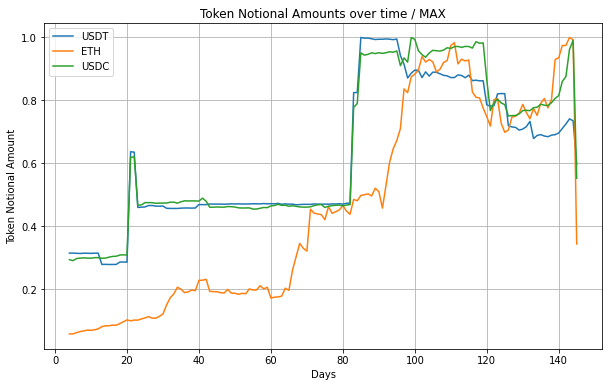

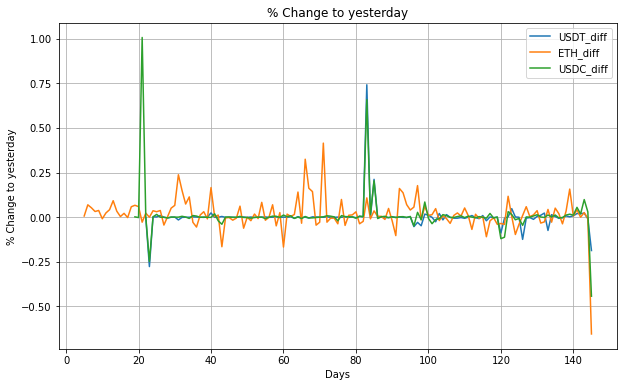

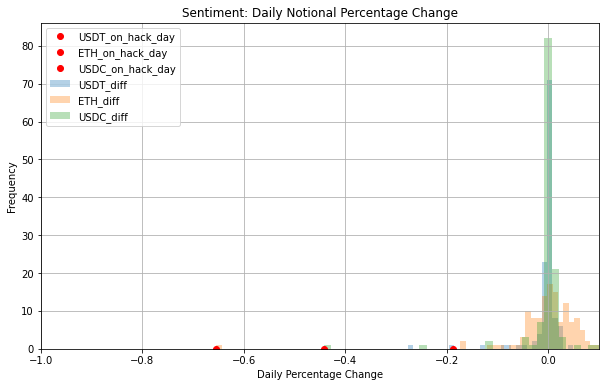

In [391]:
data_struct = DataStruct('sentiment.csv', [11,12,13], 142, [ 'USDT', 'ETH','USDC'], [1_000_000, 2_000, 1_000_000], True)
plot_data(data_struct)

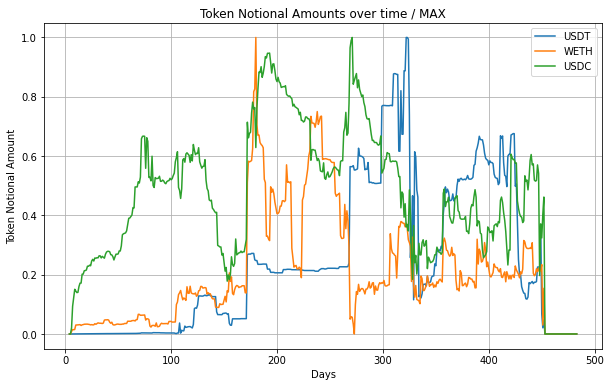

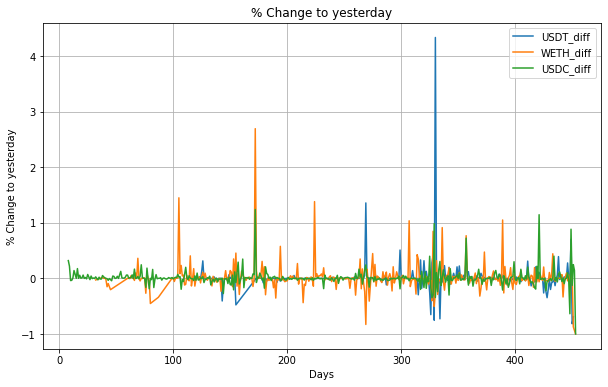

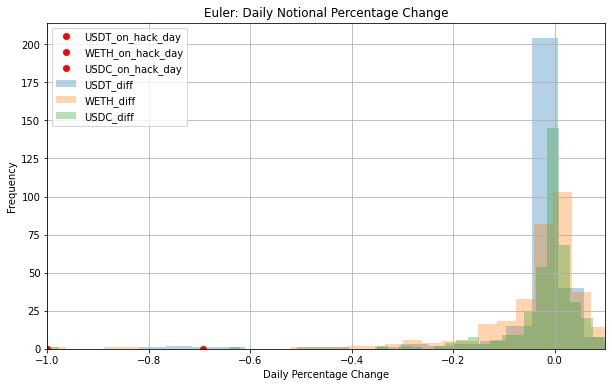

In [392]:
data_struct: DataStruct = DataStruct('euler.csv', [711,712,723], 480, ["USDT","WETH","USDC"], [2_500_000, 2_000, 2_500_000 ], True)
plot_data(data_struct)